# Weather analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df_hourly = pd.read_csv("weather_data.csv")
df_hourly.head()

,date_time,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,season
0,2020-01-01 01:00:00,1008.44,0.34,-1.54,87.1,5.45,3.37,1281.84,0.63,188.00,0.0,winter
1,2020-01-01 02:00:00,1008.32,-0.21,-1.78,89.1,5.36,3.31,1284.32,0.50,154.00,0.0,winter
2,2020-01-01 03:00:00,1008.46,-0.05,-1.71,88.5,5.39,3.33,1283.73,0.46,46.51,0.0,winter
3,2020-01-01 04:00:00,1008.00,-1.02,-2.31,90.9,5.15,3.19,1287.83,1.83,218.10,0.0,winter
4,2020-01-01 05:00:00,1007.63,-1.84,-2.78,93.2,4.97,3.08,1291.32,1.53,226.90,0.0,winter


In [3]:
df_hourly["date_time"] = pd.to_datetime(df_hourly["date_time"])
df_hourly.set_index("date_time", inplace=True)
df_hourly.head()

,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,season
date_time,,,,,,,,,,,
2020-01-01 01:00:00,1008.44,0.34,-1.54,87.1,5.45,3.37,1281.84,0.63,188.00,0.0,winter
2020-01-01 02:00:00,1008.32,-0.21,-1.78,89.1,5.36,3.31,1284.32,0.50,154.00,0.0,winter
2020-01-01 03:00:00,1008.46,-0.05,-1.71,88.5,5.39,3.33,1283.73,0.46,46.51,0.0,winter
2020-01-01 04:00:00,1008.00,-1.02,-2.31,90.9,5.15,3.19,1287.83,1.83,218.10,0.0,winter
2020-01-01 05:00:00,1007.63,-1.84,-2.78,93.2,4.97,3.08,1291.32,1.53,226.90,0.0,winter


In [4]:
# 1. resample data to weekly points
df_weekly = df_hourly.resample("W").first() # keeps "season" column

In [5]:
# 2. assign number to each week
df_weekly["idx"] = range(len(df_weekly)) # 0 to length of data frame

In [6]:
df_weekly.head()

,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,season,idx
date_time,,,,,,,,,,,,
2020-01-05,1008.44,0.34,-1.54,87.1,5.45,3.37,1281.84,0.63,188.0,0.0,winter,0
2020-01-12,1006.17,3.32,0.77,83.3,6.46,4.00,1264.66,1.15,177.2,0.0,winter,1
2020-01-19,997.35,2.71,0.16,83.2,6.18,3.86,1256.46,2.59,164.5,0.0,winter,2
2020-01-26,1015.51,2.83,0.70,85.8,6.42,3.94,1278.75,0.50,189.8,0.0,winter,3
2020-02-02,990.19,1.19,0.18,92.9,6.19,3.90,1254.34,2.39,169.6,0.0,winter,4


In [7]:
# try to predict temperature based on number of week - trend
predictors = [
    "idx"
]

X = sm.add_constant(df_weekly[predictors])
Y = df_weekly["temperature_celsius"]

In [8]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     temperature_celsius   R-squared:                       0.007
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.491
Date:                 Sun, 19 Jan 2025   Prob (F-statistic):              0.224
Time:                         20:48:43   Log-Likelihood:                -706.37
No. Observations:                  210   AIC:                             1417.
Df Residuals:                      208   BIC:                             1423.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0239      0.966      8.30

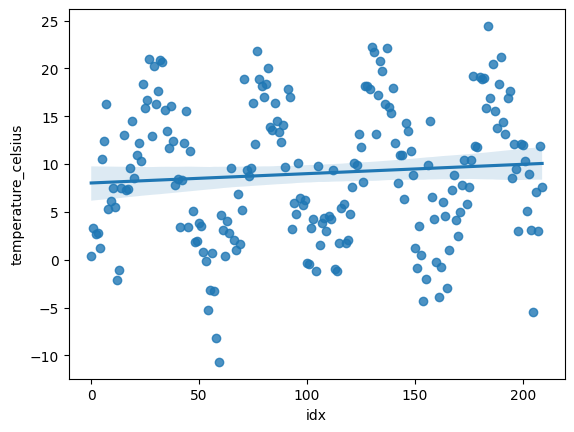

In [11]:
sns.regplot(x=df_weekly["idx"], y=df_weekly["temperature_celsius"])
plt.show()

In [12]:
# Model seasonality
print(pd.unique(df_weekly["season"]))

['winter' 'spring' 'summer' 'autumn']


In [13]:
predictors = [
    "idx",
    "season"
]

X = sm.add_constant(pd.get_dummies(df_weekly[predictors], 
                                   columns=["season"], 
                                   drop_first=True, 
                                   dtype=int))
Y = df_weekly["temperature_celsius"]

In [14]:
X.head()

,const,idx,season_spring,season_summer,season_winter
date_time,,,,,
2020-01-05,1.0,0,0,0,1
2020-01-12,1.0,1,0,0,1
2020-01-19,1.0,2,0,0,1
2020-01-26,1.0,3,0,0,1
2020-02-02,1.0,4,0,0,1


In [15]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     temperature_celsius   R-squared:                       0.575
Model:                             OLS   Adj. R-squared:                  0.567
Method:                  Least Squares   F-statistic:                     69.41
Date:                 Sun, 19 Jan 2025   Prob (F-statistic):           4.57e-37
Time:                         20:55:00   Log-Likelihood:                -617.21
No. Observations:                  210   AIC:                             1244.
Df Residuals:                      205   BIC:                             1261.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.6076      0.907 

In [16]:
df_weekly.tail()

,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,season,idx
date_time,,,,,,,,,,,,
2023-12-10,994.83,-5.48,-6.00,96.10,3.90,2.44,1292.80,1.73,213.9,0.0,winter,205
2023-12-17,975.46,7.13,5.27,87.90,8.89,5.69,1208.23,5.30,204.4,0.0,winter,206
2023-12-24,1007.28,2.99,2.65,97.60,7.39,4.58,1267.19,2.89,193.0,0.0,winter,207
2023-12-31,977.62,11.87,8.13,77.79,10.83,6.92,1189.87,4.81,213.7,0.0,winter,208
2024-01-07,979.65,7.57,2.90,72.20,7.53,4.79,1212.16,3.85,203.6,0.0,winter,209


In [17]:
X.head()

,const,idx,season_spring,season_summer,season_winter
date_time,,,,,
2020-01-05,1.0,0,0,0,1
2020-01-12,1.0,1,0,0,1
2020-01-19,1.0,2,0,0,1
2020-01-26,1.0,3,0,0,1
2020-02-02,1.0,4,0,0,1


In [18]:
week210 = [1, 210, 0, 0, 1]
results.predict(week210)

array([3.31857783])

In [19]:
week210 = [1, 210, 0, 1, 0]
results.predict(week210)

array([17.83068544])

In [20]:
# calculate residuals: actual - predicted
y_pred = results.predict(X)
y_actual = Y
residuals = y_actual - y_pred

In [21]:
residuals.head()

date_time
2020-01-05   -1.847278
2020-01-12    1.127335
2020-01-19    0.511948
2020-01-26    0.626561
2020-02-02   -1.018826
Freq: W-SUN, dtype: float64

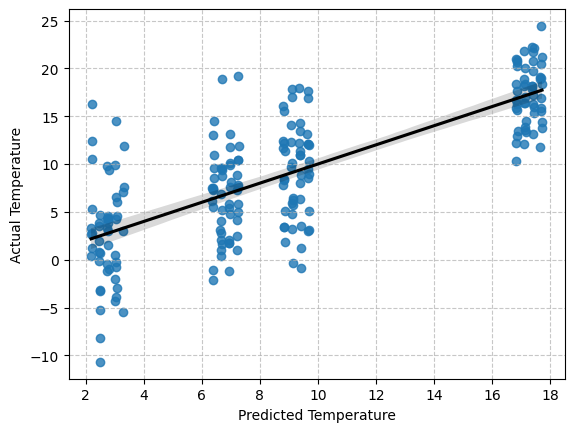

In [23]:
sns.regplot(x=y_pred, y=y_actual, line_kws={'color': 'black'})
plt.xlabel("Predicted Temperature")
plt.ylabel("Actual Temperature")
plt.grid(alpha=0.7, linestyle="--")
plt.show()

In [29]:
residuals.max()

np.float64(14.075012470182084)

In [30]:
MAE = residuals.abs().mean()
print(MAE) # in degrees C

3.5963428576939673
